<a href="https://colab.research.google.com/github/dusrbrla-mbb/kubig-portfolio/blob/temp/al_co_re_567_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### H1.csv 파일을 불러와 df 변수로 저장.
* .shape로 row, column 개수 확인(형태)
* .head() 또는 .tail() 로 몇 개의 row 눈으로 확인

1. 처음과 마지막 pdf 파일은 호텔 예약 부도(취소)를 (머신러닝으로) 예측하는 것과 관련된 선행연구 --> **Business Understanding**  
* 해당 논문이 기존과는 다른 새로운 접근방법을 취하고 있으며, 나의 연구가 그 방법을 참고해야 하는 경우, 논문을 모두 읽어야 함.  
* 그러나 대부분의 경우, 모두 읽을 필요는 없으며, 부분만 발췌해도 된다.  
구성 : Abstract, Introduction(Background), Data and Methods(Methodology), Results, Discussion, Conclusion, Summary  
따라서 **제목 내지 Abstract(개요), Introduction**, Conclusion(결론)만 읽어보아도 선행연구의 목표 및 근거를 알 수 있다.  
다만 목적에 따라 집중하는 부분이 달라지게 된다.  
\--> 중요한(강조하는) 문장만 추출하는 알고리즘을 이용하는 경우도 있을 정도이다.  

2. 세 번째 파일은 원본 데이터(가공 전)를 수집한 방법과 이에 대한 설명 자료이다.

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Study/Jupyter/hotel_booking'
#path = r'C:\Users\kyg\Documents\Study\Jupyter\hotel_booking'
df = pd.read_csv(path + '/' + "H1.csv")
print(df.shape)
df.head().T
# 참고로 데이터 분석 고수의 반열로 올라가면, 기밀 사항을 분석할 때가 있는데, 이 경우에는 컬럼명이 단순히 알파벳일 수도 있음.

Mounted at /content/drive
(40060, 31)


,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


### 대상 분야 이해
##### Business Understanding
* 이 분야 사람들이 지금까지 무슨 고민을 했나?
* 이 분야에서 자주 사용되는 특수한 알고리즘이 있나? 있다면 이유는?  
* 쇼핑몰의 경우 CF, 공장 FFT, 보험 Cox-PH 등  
* 포르투갈 남부 알가르브의 한 리조트 호텔의  
PMS(Property Management System, 자산 관리 시스템)에서 수집.
* 수요량 예측 + 예약 취소확률 을 이용하여 초과예약(Over-Booking)을 관리해 수익 극대화 -> 목적
* 고객이 예약을 취소할지 여부(확률)를 알고자 함.
* 예약 취소에 영향을 미치는 요인을 골라낼 수 있다면, 선별하여 관리하고자 함.

### 데이터 이해 단계
##### Data Understanding
* 가용 데이터는 무엇인가? 정의된 컬럼 이해
* 비즈니스 이해 단계에서 도출한 방향성 달성을 위한 재료가 충분한가?  
 **IsCanceled** - **예약 취소**를 했는가 여부 -> 이 데이터 셋의 **label**에 해당  
LeadTime - 예약시점과 체크인시점의 간격  
ArrivalDateYear - 몇 년도로 예약했는가  
ArrivalDateMonth - 몇 월로 예약했는가  
ArrivalDateWeekNumber - 1년을 52주라고 생각했을 때 몇주차로 예약했나  
ArrivalDateDayOfMonth - 한 달 기준 몇 번째 일로 예약했나?  
StaysInWeekendNights - 주말 숙박일수  
StaysInWeekNights - 주중 숙박일수  
Adults - 예약인원 기준 성인 인원수  
Children - 예약인원 기준 청소년 인원수  
Babies - 예약인원 기준 아기 인원수  
Meal - 식사를 같이 예약했는지, 했다면 어떤 식사인지  
Country - 예약자의 국적  
IsRepeatedGuest - 재방문고객 여부  
PreviousCancellations - 과거 취소이력  
ReservedRoomType - 고객이 예약한 상품 종류  
AssignedRoomType - 고객에게 할당한 상품 종류  
BookingChanges - 예약 세부사항 변경횟수  
DepositType - 예약 취소시 환불범위  
DaysInWaitingList - waiting 발생시 고객이 기다린 기간  
ADR - 객단가, 이 값이 높을수록 좋은 고객  
RequiredCarParkingSpaces - 주차 대수 요구  
TotalOfSpecialRequests - 예약시 특별한 요청을 한 횟수  

In [ ]:
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


##### 경우의 수 컬럼 처리법(경우의 수 -> 숫자 변환법)
1. Apply Domain Knowledge
2. Frequency Encoding
3. Target Encoding
4. One-Hot Encoding

In [ ]:
df['Country'].value_counts()  # 각 값에 해당하는 row 개수 세기

PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
       ...  
BIH        1
MUS        1
COM        1
UGA        1
DJI        1
Name: Country, Length: 125, dtype: int64

In [ ]:
# 호텔이 포르투갈이고, 방문객 국적이 있으므로 내국인/외국인 여부 반영 가능.
# 도메인 지식을 활용(1번 방법)하여 Foreigner 컬럼 생성.
df['Foreigner'] = 0  # 'Foreigner' 컬럼에 미리 0 배정.
df.loc[df['Country'] != 'PRT', 'Foreigner'] = 1  # 'PRT'가 아닌 모든 row에 대해 'Foreigner' 컬럼에 1 배정(0 -> 1)
interested = ['Country', 'Foreigner']
df[interested].head()

,Country,Foreigner
0,PRT,0
1,PRT,0
2,GBR,1
3,GBR,1
4,GBR,1


##### Frequency Encoding
* 각 경우의 수의 빈도로 숫자를 만들기.

In [ ]:
# Frequency Encoding의 두 가지 방법 중 쉬운 방법(기계적 처리) 활용.
country_ratio = pd.DataFrame(df['Country'].value_counts(normalize=True)).reset_index()  # 국적 정보를 index로 사용 X
country_ratio.columns = ['Country', 'Country_Ratio']  # 컬럼 이름 변경
country_ratio

,Country,Country_Ratio
0,PRT,0.445247
1,GBR,0.172088
2,ESP,0.099934
3,IRL,0.054702
4,FRA,0.040686
...,...,...
120,BIH,0.000025
121,MUS,0.000025
122,COM,0.000025
123,UGA,0.000025


In [ ]:
# interested = ['Country', 'Country_Ratio', 'Foreigner']
# pd.merge(df, country_ratio)[interested] -> 확인
df = pd.merge(df, country_ratio)
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,1
LeadTime,342,737,0,9,85
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,2,2,3
Adults,2,2,2,2,2
Children,0,0,0,0,0


##### Target Encoding
* 경우의 수 컬럼의 경우별로 target 의 통계량을 뽑아냅니다(평균, 표준편차 등)

In [ ]:
import numpy as np
df.groupby('Country').agg({'IsCanceled' : np.mean})
# 가능은 하지만 너무 적은 부분까지 신경쓰다 보면, 필연적으로 과적합 발생.

,IsCanceled
Country,
AGO,0.291667
ALB,0.333333
AND,0.600000
ARE,0.727273
ARG,0.157895
...,...
VEN,0.333333
VNM,0.000000
ZAF,0.277778


In [ ]:
sum(country_ratio.head()['Country_Ratio'])  # 상위 5개 국가 방문객 총합 : 약 81%

0.8126578442266895

In [ ]:
top_5 = list(country_ratio.head()['Country'].values)
# 고객들 중 상위 5개국을 선별하여 리스트화.
top_5

['PRT', 'GBR', 'ESP', 'IRL', 'FRA']

In [ ]:
df['Country_simple'] = df['Country'].apply(lambda x : x if x in top_5 else 'Other')
# lambda x : x if x in top_5 else 'Other'
# x if x in top_5 -> x in top_5 조건이 True 이면 결과가 x(그대로)
# if x in top_5 else 'Other' -> x in top_5 조건이 False 이면 결과가 'Other'
# x 는 df['Country'] 컬럼의 row 별 값 하나씩을 의미.

# ex. 만약 x가 PRT 인 경우, PRT in top_5 조건은 True

# 해당 컬럼의 경우의 수가 너무 많고, 대다수의 경우의 수의 비중이 너무 적을 때는, 위와 같이 비중이 큰 경우의 수만 남기고 나머지는 기타로.
# 이렇게 정리하면 Target Encoding 을 무리 없이 사용 가능!

In [ ]:
simple = df.groupby('Country_simple').agg({'IsCanceled' : np.mean}).reset_index()
simple.columns = ['Country_simple', 'Country_Cancel_Ratio']
simple
# 이 방법 역시 기계적인 처리가 대다수인 방법.

,Country_simple,Country_Cancel_Ratio
0,ESP,0.215062
1,FRA,0.130975
2,GBR,0.130760
3,IRL,0.199446
4,Other,0.169048
5,PRT,0.421894


In [ ]:
df = pd.merge(df, simple)
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,1
LeadTime,342,737,0,9,85
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,2,2,3
Adults,2,2,2,2,2
Children,0,0,0,0,0


In [ ]:
# 만약 경우의 수가 많지만, 거의 균일한 비중으로 이루어져 있다면
# 코드를 활용하여 기계적으로 처리하면 됨(기타로 묶는 등의 아이디어 불필요)

##### One Hot Encoding

In [ ]:
# One Hot Encoding
pd.get_dummies(df['Country_simple'])  # 'Country' 컬럼에 대해 더미변수 설정
# 해당 컬럼의 경우, 희소하게 1이 배치되어 있는 sparse matrix.

# 이 방법도 Target Encoding 과 마찬가지로, 경우의 수가 너무 많으면, 모든 더미변수의 중요도가 낮게 나와 아무런 정보를 주지 못함.
# 이때 더미변수의 개수는 컬럼의 개수보다 반드시 1개 적어야 함 -> linear independence 를 유지하기 위함

,ESP,FRA,GBR,IRL,Other,PRT
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
39591,0,1,0,0,0,0
39592,0,1,0,0,0,0
39593,0,1,0,0,0,0
39594,0,1,0,0,0,0


In [ ]:
# 위의 4가지 방법 중 하나만 사용해도 됨.
# 만약 4가지 방법을 모두 사용하고자 한다면, Feature Selection 에서 최대한 빡빡한 기준으로, 최대한 많은 변수들을 제외하면 됨.
# 그 이유는 위의 방법들은 모두, 변수의 개수를 늘리는 방법이기 때문.

##### Label Encoding???
 **오개념 주의!**
* sklearn.preprocessing.LabelEncoder 를 가져오면 해당 방법을 사용할 수 있다.
* 이때 범주형 자료에 대해 숫자로 변환한다는 점에서 기능은 위의 4가지 방법과 동일하나,  
 **label 인 y에만 적용가능**한 방법이므로 Features 인 x에는 적용하면 안 된다.  
* 단, 경우의 수에 기계적으로 숫자를 할당하는 것(Label Encoding)은 *특수한 상황*에서, 적절한 방식을 적용한다면 의미가 있음.
* 경우의 수에 기준을 들이대었을 때, **정도의 차이**가 생긴다면  
숫자로 변환이 가능하다.(직접 손으로 경우의 수와 숫자를 연결하여 작업함)
 
데이터 분석을 공부할 때는 이론뿐만 아니라, 프로그램의 패키지를 이용할 때도 정확한 용법을 알아야 한다.  
따라서 오개념이 잡히지 않게 조심하고, 항상 의심하는 자세로 교차 검증 등을 실시해야 한다.  
이러한 오개념을 바로잡는 데 수학과 컴퓨터학이 유용하다.

##### 도메인 지식을 적용하여 경우의 수를 0, 1, 2, ... 바꾸는 것(Label Encoding 과 동일한 방식)은 의미가 있음.
##### Meal 컬럼의 경우 :
* SC & Undefined, 식사 예약 X
* BB : Bed & Breakfast, 조식
* HB : Half Board, 조식 + 1식 추가
* FB : Full Board, 조식 + 2식 추가(모든 식사 호텔에서)  

식사 예약 개수만큼 *호텔에 머무는 시간*이라는 정도의 차이가 발생한다.

In [ ]:
np.unique(df['Meal'])

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

In [ ]:
# 식사 예약 끼니수를 기준으로 본다면, '호텔에서 하루에 체류하는 순수 시간' 이라는
# 정도의 차이가 발생(전부 밖에서 < 전부 안에서), 이를 반영.
t = {'SC       ' : 0, 'Undefined' : 0, 'BB       ' : 1, 'HB       ' : 2, 'FB       ' : 3}
df['Day_Stay'] = df['Meal'].map(t)
# 이 방법은 Label Encoding 과 동일한 방식으로 진행했지만, 패키지를 사용하지 않은 이유는?
# 패키지의 알고리즘 상에서는 정도의 차이(도메인 지식)를 활용하지 못하고 단순히 알파벳 순으로 값을 배정하기 때문.

### 데이터 탐색
##### Data Exploration
* 그래프를 그리기 위해 컬럼을 2 ~ 3개 골라잡아 화면에 그림으로 표현해야 한다.
* 데이터 프레임상의 컬럼 개수가 적을 대에는 문제가 되지 않지만,  
지금처럼 개수가 많아진다면 2 ~ 3개 골라잡는 경우의 수가 너무 많아지는 문제 발생.

In [ ]:
df.shape

(39596, 36)

In [ ]:
df.describe().columns  # 숫자 컬럼들 나열

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Foreigner',
       'Country_Ratio', 'Country_Cancel_Ratio', 'Day_Stay'],
      dtype='object')

In [ ]:
label = 'IsCanceled'  # 사실 label 이 어떤 변수인지에 대해서도 깊게 고민해야 함.
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Foreigner',
       'Country_Ratio', 'Country_Cancel_Ratio']
X, y = df[features], df[label]

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rf
model = rf()
model.fit(X, y)
imp = pd.DataFrame()
imp['features'] = features
imp['importance'] = model.feature_importances_
imp.sort_values(by='importance')  # 중요도 결과를 통해 'LeadTime' 변수가 그래프의 축에 필요함을 알 수 있음.
# 탐색 진행시, 그래프를 그릴 때 어떤 컬럼을 골라야 할지 결정할 때, 컬럼의 중요도 활용.

,features,importance
13,DaysInWaitingList,0.001334
8,Babies,0.002183
9,IsRepeatedGuest,0.006549
11,PreviousBookingsNotCanceled,0.009955
7,Children,0.015663
6,Adults,0.019012
17,Foreigner,0.028115
10,PreviousCancellations,0.029180
12,BookingChanges,0.030249
1,ArrivalDateYear,0.036366


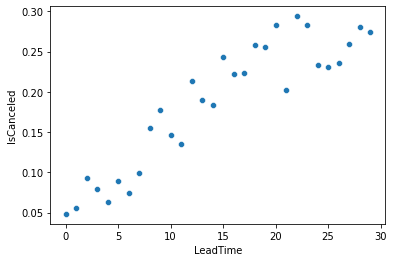

In [ ]:
# 숫자 컬럼 중 'LeadTime'과 'ADR'이 아주 중요한 컬럼임을 확인.
import seaborn as sns
tgt_df = df.groupby('LeadTime').agg({label : np.mean}).reset_index()  # IsCanceled 를 취소율로 변경
# 0과 1로 이루어진 IsCanceled 컬럼에 대해 평균을 적용하면,
# 동일한 LeadTime(ex. 5일) 일 때의 취소율을 알 수 있음.
tgt_df = tgt_df.loc[tgt_df['LeadTime'] < 30]  # tgt_df 의 x축 범위 축소
sns.scatterplot(data=tgt_df, x='LeadTime', y='IsCanceled')

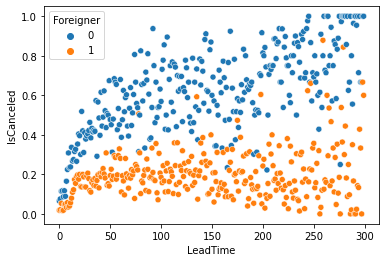

In [ ]:
# hue 를 설정(하나의 변수를 더 추가)하기 위해서는,
# tgt_df 를 multi-index aggregation 을 활용하여 groupby 를 세분화하여 합산해야 함.
tgt_df = df.groupby(['LeadTime', 'Foreigner']).agg({label : np.mean}).reset_index()
tgt_df = tgt_df.loc[tgt_df['LeadTime'] < 300]
sns.scatterplot(data=tgt_df, x='LeadTime', y='IsCanceled', hue='Foreigner')
# 그래프에 따르면, 내국인이 외국인에 비해 취소율이 높음을 알 수 있음.
# 예약 방법이나 수월함(접근성) 등의 이유로 이러한 패턴을 보일 것이라고 주장할 수 있음.
# 즉, '예약의 용이함'과 '취소율' 간 관계가 존재할 것이라는 관점을 가질 수 있음.
# 실제로 원본 데이터에서 예약 경로(온라인 등)에 관한 컬럼이 존재함 -> 입증 가능

In [ ]:
df['car_yes'] = 0
df.loc[df['RequiredCarParkingSpaces'] > 0, 'car_yes'] = 1

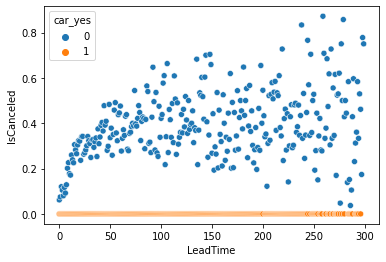

In [ ]:
tgt_df = df.groupby(['LeadTime', 'car_yes']).agg({label : np.mean}).reset_index()
tgt_df = tgt_df.loc[tgt_df['LeadTime'] < 300]
sns.scatterplot(data=tgt_df, x='LeadTime', y='IsCanceled', hue='car_yes')

In [ ]:
df['RoomChange'] = 0
df.loc[df['ReservedRoomType'] != df['AssignedRoomType'], 'RoomChange'] = 1

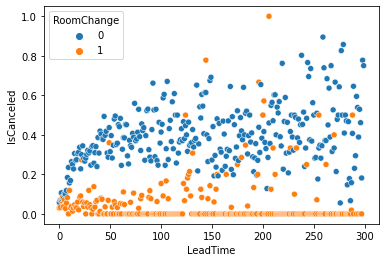

In [ ]:
tgt_df = df.groupby(['LeadTime', 'RoomChange']).agg({label : np.mean}).reset_index()
tgt_df = tgt_df.loc[tgt_df['LeadTime'] < 300]
sns.scatterplot(data=tgt_df, x='LeadTime', y='IsCanceled', hue='RoomChange')

> 과제? 여러 가지 변수를 활용하여 그래프를 그려본 후, 예약 취소율과 밀접한 관련이 있는 변수 찾아보기.

In [ ]:
# 위의 경우(hue='Foreigner')를 제외하고도
# 참고로 ReservedRoomType 과 AssignedRoomType 을 이용하여,
# 방의 달라진 여부를 RoomChange 라는 새로운 변수로 할당한다.
# 이후 hue='RoomChange' 로 그래프를 그려보면 큰 차이가 발생함을 알 수 있다.

# RequiredCarParkingSpaces 라는 변수로도 그래프를 그려본다.
# 기타 등등

## 참고

#### 데이터 분석 관련 참고 사이트
https://cafe.naver.com/sqlpd
* 빅데이터분석기사 시험의 실기 파트 연습 자료도 참고한다.

### ADSP < 빅데이터분석기사 < ADP - 데이터 분석
ADSP의 경우, 전문성은 떨어지지만 ADP의 자격 요건으로서 유의미.  
빅데이터분석기사의 경우, 필기 시험은 ADSP와 거의 유사하고 실기 추가(기계적 처리 수준).  
**ADP**의 경우, 필기 시험의 범위가 넓어지고 실기가 아주 까다로움(기계적 처리 + 그래프 + 문장 도출 후 보고서 작성).
#### SQLD / SQLP - sql 자격증
DataBase 분야(내부 데이터와 통신), 컴공/통계, 학부 과정에서도 가능, 데이터 분석보다 데이터 엔지니어링
##### DASP / DAP - 데이터베이스 인프라 구축
DataBase 분야(데이터 아키텍쳐 구축), 활용성 낮지만 해당 분야에서는 유용, 일반적으로 업계 근무 도중에 취득  

이외에 **국제 자격증에도 알리바바, IBM, 엔비디아, DELL, 화웨이 등 주최사가 유명한 경우에는 추천(머신 러닝)**  
데이터 분야에서는 자격증만으로 판단하지 않음, 그러나 자격증이 많다면 유리함.

### 데이터 준비 단계
##### Data Preparation
* train / test split 

In [ ]:
df.describe().columns  # 숫자 컬럼만 모두 불러옴

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Foreigner',
       'Country_Ratio', 'Country_Cancel_Ratio', 'Day_Stay', 'car_yes',
       'RoomChange'],
      dtype='object')

In [ ]:
# 'RequiredCarParkingSpaces' 컬럼으로 'car_yes' 를 만들었기 때문에
# 둘 중 하나를 제외하여야 한다. 따라서 RequiredCarParkingSpaces' 컬럼 제외.
label = 'IsCanceled'
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'TotalOfSpecialRequests', 'Foreigner',
       'Country_Ratio', 'Day_Stay', 'Country_Cancel_Ratio', 'car_yes']
train, test = df[0::2], df[1::2]  # 홀/짝 기준으로 공부용/시험용 데이터셋 분리
train, test = train.reset_index(), test.reset_index()  # 인덱스(순서) 새로 매김
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]
# features 로 문제 분리, label 로 정답 분리
# 공부용과 시험용 데이터 셋에 대하여 문제집과 정답지를 나눈다.

### 모델 기획 / 수립
##### Model Planning / Building
* 트리 구조 알고리즘을 이용하고, 내부가 어떻게 생겼는지 파악
* 알고리즘 분야에서 통용되는 용어 정리
* 앙상블, 배깅, 부스팅

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import export_graphviz as eg
depth = 3  # 하위 단계가 3개임을 의미.
model = dt(max_depth=depth)  # 내부의 깊이가 depth 만큼인 알고리즘 생성
model.fit(X_train, y_train)  # 알고리즘으로 데이터셋 학습
eg(model, out_file=f'depth_{depth}.txt',  # 학습이 끝난 알고리즘(model 변수)을
   feature_names=features, class_names=['no', 'yes'])  # 텍스트 파일로 저장.
# 단일 의사결정 나무 알고리즘의 장단점
# 장점_1 : 학습 속도가 매우 빠른 알고리즘
# 장점_2 : 해석력(Explainability)이 좋다.
# 장점_3 : 비선형성을 갖는 패턴 또한 파악 가능(비선형 알고리즘들의 공통적 특징)
# 단점 : 오버피팅(과적합, train good test bad) 발생이 용이함.
# 장점이 아주 많으나, 단점이 너무 커서 독자적 사용이 어렵고 다른 알고리즘을 함께 사용해야 함.

In [ ]:
# 위 코드의 실행 결과로 생성된 텍스트 파일은 사람이 코드를 읽으라는 의미 X
# https://dreampuf.github.io/GraphvizOnline/#digraph 로 들어가 복붙 후, 그림으로 확인한다.

* 첫 의사결정 기준은 'Foreigner' 컬럼이며 그 값은 0.5
* gini : 불순도, 0과 1의 개수가 한쪽에 몰려 있을수록 낮음 -> 해석력과 연관됨
* samples : 학습(판별대상)에 사용한 row 수
* value : [0(no) 개수, 1(yes) 개수]
* class : 이 대상에서 전부 하나의 답을 낸다면? ('no'와 'yes' 중 하나로만 찍어야 한다면 'no' 선택)

In [ ]:
X_train.shape  # 위의 그림에서 samples 의 의미

(19798, 21)

아래 조건을 전부 만족하는 row 는 전체 514개의 row 이며,  
gini 계수가 0 이므로 완전하게 분류가 된 상황.  

value = [514, 0] -> 전부 label 값이 0이다.  

* True : Foreigner <= 0.5 -> **내국인**  
* False : LeadTime <= 17.5 -> **예약일과 체크인 날짜가 2~3주 이상**  
* False : car_yes <= 0.5 -> **차 가져온 사람**  

##### 내국인 + 2~3주 전 예약 + 차 가져옴 = 예약 취소 확률 0% (알고리즘의 기존 데이터 학습 결과)
조건문과 비슷하므로 이 과정을 if ~ then 로직이라고도 한다.

In [ ]:
model = dt()  # depth 를 설정하지 않은 모델 -> fully grown tree
model.fit(X_train, y_train)
eg(model, out_file=f'depth_full.txt',
   feature_names=features, class_names=['no', 'yes'])
# 모든 gini 계수가 0 이 될 때까지 과정을 반복하다 보면 엄청난 과정을 거치게 됨

In [ ]:
depth = 10  # 일반적으로 한 눈에 보이는 그림은 3 ~ 5 정도.
model = dt(max_depth=depth)
model.fit(X_train, y_train)
eg(model, out_file=f'depth_{depth}.txt',
   feature_names=features, class_names=['no', 'yes']) 

In [ ]:
# depth 가 3, 10인 경우와 정하지 않은 경우 비교하기
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8690776846146075
0.8472067885645015


### 지니계수 계산방식
##### 불순도(불순한 정도)를 확인한다.
* 특정 사건이 일어날 확률 yes_prob
* 특정 사건이 안 일어날 확률 no_prob
* yes_prob * (1 - yes_prob) 를 A 라 하고  
no_prob * (1 - no_prob) 를 B 라 하면
* 지니계수는 A + B.
* 지니계수는 0 ~ 0.5 사이의 값을 갖고, 순도가 높을수록 0에 가가움.

In [ ]:
train_len = 19798
yes_prob = 5550 / train_len
no_prob = 14248 / train_len
A = yes_prob * (1 - yes_prob)
B = no_prob * (1 - no_prob)
print(A + B)
# 첫 의사 결정 시, gini 계수 0.403 확인.

0.4034913654274472


In [ ]:
train_len = 10983
yes_prob = 9159 / train_len
no_prob = 1824 / train_len
A = yes_prob * (1 - yes_prob)
B = no_prob * (1 - no_prob)
print(A + B)
# 두 번째 의사 결정 시(False), gini 계수 0.277 확인.

0.2769879789636901


##### 아래 조건 만족 시, 지니계수 0 확인.
* True : Foreigner <= 0.5 -> 내국인  
* False : LeadTime <= 17.5 -> 예약일과 체크인 날짜가 2~3주 이상  
* False : car_yes <= 0.5 -> 차 가져온 사람

In [ ]:
f1 = train.loc[train['Foreigner'] <= 0.5]  # 내국인을 f1, 마지막 코드에서 label 이 필요하므로 X_train 이 아닌 train 전체.
f2 = f1.loc[f1['LeadTime'] > 17.5]  # f1 중 예약일과 체크인 날짜가 2~3주 이상을 f2
f3 = f2.loc[f2['car_yes'] > 0.5]  # f2 중 차 가져오는 사람을 f3
all_num = len(f3)
f3[label].value_counts()

0    514
Name: IsCanceled, dtype: int64

In [ ]:
yes_prob = 0 / all_num
no_prob = 514 / all_num
A = yes_prob * (1 - yes_prob)
B = no_prob * (1 - no_prob)
print(A + B)  # 위 3개의 필터를 거쳤을 때, 지니계수 값 0 확인.
# 결론적으로 트리 알고리즘은 지니계수를 낮추는 방향으로 분기 형성.

0.0


### 알고리즘 용어 정리
##### 앙상블(ensemble), 배깅(Bagging), 부스팅(Boosting)

### 앙상블
##### 최종 예측값을 내기 위해 여러 알고리즘의 결과값을 이용하는 방법 통칭.
* 예) 숫자를 예측한다면 알고리즘들의 결과가 숫자들이고, 이를 평균.
* 예) 경우의 수를 예측한다면 알고리즘들의 결과를 투표로 결정.
* 만약 더 공부한다면?  
stacking, voting, blending 개념도 존재

### 배깅
##### bagging = bag + ing, bag = 'b'ootstrap + 'ag'gregation
* bootstrap : 데이터의 row 를 무작위로 추출하여 새로운 데이터 셋을 생성(복원추출 -> 중복될 수도, 하나도 안 뽑힐 수도 있음)
* 같은 데이터로 같은 알고리즘에 넣고 학습하면(랜덤성 X) 항상 같은 결과가 나옴.
* 붓스트랩을 활용하면 데이터 셋 자체가 무작위로 달라짐  
\-> 새로운 데이터 셋에 대하여 알고리즘으로 학습하여, 다른 학습 결과 도출  
\-> n 개의 조금씩 다른 결과 합산(결국, 앙상블)
* randomforest 의 경우, 배깅 계열 알고리즘.  
100 개의 서로 다른 데이터 셋을 bootstrap 으로 만들어 decisiontree 알고리즘으로 학습하면,  
\-> 서로 다른 100개의 decisiontree 알고리즘이 학습됨.  
\-> 이때 서로 다른 decisiontree 알고리즘을 적용할 때, 랜덤성을 더 부여하기 위해, features(컬럼) 역시 랜덤으로 선택하도록 설계.  
\-> 이 결과를 합산하여 결과를 내는 알고리즘이 randomforest.

### 부스팅
##### 오답노트와 유사한 접근방식
* 학습(fit) 후, 문제를 풀면(predict), 잘 / 못 맞추는 row 특정 가능.
* 못 맞추는 문제(row)를 어떻게든 잘 맞출 수 있게끔 하는 접근방식 **통칭**(여러 방법 존재).
* 예_1) 한 알고리즘으로 학습 + 예측 후 못 맞추는 row 특정하고  
못 맞추는 row 를 학습 데이터에 더 추가(샘플링)하여 새로운 데이터 셋 만들고 학습.
* 예_2) 첫 알고리즘으로 학습 후, 예측하여 못 맞춘 정도(오차)를 새로운 label로 삼고  
두 번째 알고리즘으로는 첫 알고리즘이 얼마나 틀릴지를 label로 삼아 학습.  
세 번째, 네 번째, ... 이어서 진행.  

통칭이라는 말에서 알 수 있듯이 예_1) 만 부스팅이 아님.  
결국에는 배깅과 부스팅 역시 앙상블의 개념이 사용됨.

### 현 시점 정형데이터 기준, 가장 정확도가 높은 알고리즘은 부스팅 계열.
##### GBDT(Gradient Boosted Decision Tree) 군
* 예) XGBoost, CatBoost, lightgbm
* 부스팅 계열 알고리즘들의 큰 단점 :
1. 속도가 느림
2. 과적합이 쉽게 발생 -> 대충 사용 시, randomforest 보다 성능 떨어짐.

참고로 딥러닝의 경우, 일반적으로는 가장 복잡하기 때문에 정확도가 높은 편이지만, 데이터 프레임 상에서는 약함.  
만약 용량이 일정 수준을 넘어서면 딥러닝 계열 알고리즘이 유리함.  
즉, **모든 상황에서 가장 높은 정확도를 보이는 마스터키 알고리즘은 존재하지 않는**다.

### 분류 문제의 평가지표
##### 지난 수업에서의 회귀문제(숫자 예측)와는 기준이 다르다.
* 회귀문제(숫자 예측)에서는 맞는 / 틀린 정도를 숫자(오차의 크기)로 표현 가능.
* 분류 문제에서는 이를 숫자로 표현하는 것이 불가능(크기 존재 X)

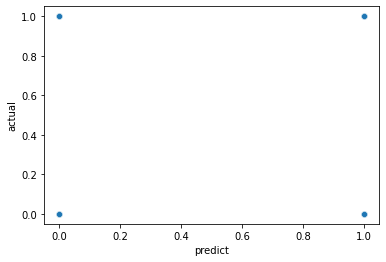

In [ ]:
import seaborn as sns
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test  # 지난 회귀 문제와 유사하게, 분류 문제를 산점도로 시각화 시도.
sns.scatterplot(data=for_plot, x='predict', y='actual')  # 총 4가지 경우의 수밖에 존재하지 않으므로 그래프의 의미가 없음.
# 단, 그래프를 그리는 의미가 없을 뿐이지, 각 점이 가지고 있는 의미는 중요함(평가지표 생성에 이용).

### 분류 문제는 기본적으로 아래 그림을 이용하여 평가지표 도출
##### Confusion Matrix(혼동행렬) 이라 한다.
* T / F -> 맞춘 것이 T, 틀린 것이 F
* P / N -> 예측 결과가 1 이면 P, 0 이면 N
* T / F 중 하나 뽑고, P / N 중에서 하나 뽑아서 조립한 것.

##### 분류 문제의 평가지표들
1. accuracy -> 전체 중에 몇 개 맞춤?  
acc = (TP + TN) / (TP + TN + FP + FN)  

2. precision -> 예측 모델이 1(Positive) 로 예측한 것 중 맞춘 비율  
prec = TP / (TP + FP)  

3. recall -> 실제 값이 1 인 것 중 맞춘 비율  
recall = TP / (TP + FN)

4. fall-out -> 실제 값이 0 인 것 중 틀린 비율(단독보다는 recall 과 결합해 그래프 형성)  
fall = FP / (FP + TN)

참고로, precision 과 recall 의 관계는 FP(2종 오류) 와 FN(1종 오류) 의 관계와 관련있고, trade-off 관계이다(아래 참고).  

accuracy 를 사용해도 되지만, 상황에 따라 사용하지 말아야 하거나 단독으로 사용하면 안 되는 경우가 존재한다.

##### accuracy 대신 precision, recall, ... 등이 사용될까?
* class-imbalance issue 가 있을 경우, 반드시 대체해야 함.
* class-imbalance issue(클래스 불균형 문제) : 경우의 수가 한 쪽으로 치우친 경우
* 예) 암 환자 데이터 셋?  
환자 중 암 환자의 비율은 매우 낮을 것(0.01%로 가정)  
\-> 즉, 1만명 중 1명 꼴로 암 환자이므로, 알고리즘 학습 필요 없이 암 환자가 아니라고 예측하면  
\-> row 중 9999 개는 맞고, 1개는 틀릴 것  
\-> 그렇다면 accuracy 기준, 99.99% 정확도??

대다수의 데이터 셋은 class-imbalance issue 가 존재하기 때문에, accuracy 만 사용하면 부정확한 평가를 할 수밖에 없음.  
\-> 따라서, 일반적으로 accuracy 를 잘 사용하지 않는다.

##### FP 와 FN 해석하기 - trade-off 관계
1. 화재경보(불 나면 1, 안 나면 0) -> 1 이 알람 울림, 0 이 알람 안 울림.
* FP : False Positive = False Alarm, 불 났다고 판단했으나 불 안 남.
* FN : False Negative = Miss, 불 안 난 줄 알았는데 화재 발생.

더 critical 한 오류인 FN(1종 오류) 을 0에 수렴하도록 줄여야 함.

2. 스팸 메일 분류(스팸이면 1, 아니면 0)
* FP : False Positive = 스팸이라 판단했으나 스팸메일이 아님.
* FN : False Negative = 스팸이 아니라 판단했으나 스팸메일.

반면에 여기서는 FP(2종 오류) 가 더 심각한 오류.

* 환자 검진에 이용 -> 1 이 병에 걸렸다고 판단, 0 이 안걸렸다고 판단
* 금융 사기 탐지에 이용 -> 1 이 사기라고 판단, 0 이 사기 아니라 판단
* 게임 어뷰저 분류 이용 -> 1 이 어뷰저 라고 판단, 0 이 어뷰저 아니라 판단
* 위 3가지 경우에 대하여 FN 과 FP 중 어디에 더 중점을 두어야 할 지 생각해보기!

당연하게도 일단은 F 자체를 줄이는 것이 가장 중요하다. 그러나, 둘 다 줄이는 것은 한계가 있다.  
결론적으로 분야와 상황에 따라, FN(1종 오류) 과 FP(2종 오류) 중에 더 중요한 오류가 달라진다.  
따라서 이를 분석한 후, precision 과 recall 중에 하나를 선택해서 사용한다.

In [ ]:
from sklearn.metrics import confusion_matrix as cm
TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()  # 배열 -> 1차원
print(TN, FP, FN, TP)

12982 1289 1736 3791


In [ ]:
acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
recall = TP / (TP + FN)
fall = FP / (FP + TN)
print(acc)
print(prec)
print(recall)
print(fall)

0.8472067885645015
0.746259842519685
0.685905554550389
0.09032303272370541


### ROC_Curve
##### 분류모형의 성능을 시각화하여 판단함(여러 모델을 비교할 때, 주로 사용)
* y 축을 recall, x 축을 fall-out 으로 둔 것
* 그림 + 곡선 아래의 면적(AUC, Area Under Curve)으로 판단.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb
m1, m2, m3 = dt(), rf(), gb()
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)
r1 = pd.DataFrame(m1.predict_proba(X_test), columns=['negative', 'positive'])
r2 = pd.DataFrame(m2.predict_proba(X_test), columns=['negative', 'positive'])
r3 = pd.DataFrame(m3.predict_proba(X_test), columns=['negative', 'positive'])
# predict_proba 는 예측할 확률을 나타낸다(예측 결과가 아닌 확률(자신감)을 나타냄)

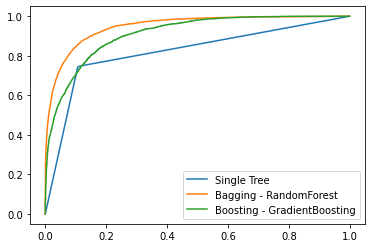

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# roc_curve 는 ROC_Curve 를 그리기 위한 정보를 뽑아주는 도구입니다.
x1, y1, _ = roc_curve(y_test, r1['positive'])
x2, y2, _ = roc_curve(y_test, r2['positive'])
x3, y3, _ = roc_curve(y_test, r3['positive'])
plt.plot(x1, y1, label='Single Tree')
plt.plot(x2, y2, label='Bagging - RandomForest')
plt.plot(x3, y3, label='Boosting - GradientBoosting')
plt.legend()
# AUC - Area Under Curve : 곡선 아래의 면적, 1에 가까울수록(면적이 넓을수록) 정확도가 우수함.
# 위에서 언급했듯이, 원래는 boosting 계열의 정확도가 가장 우수하지만, 대충 사용했을 경우 RandomForest 보다 떨어짐.

##### ROC_Curve -> 어떻게 그려지는가?
* 확률과 실제 정답을 이용하여 y 축을 recall, x 축을 fall-out 좌표로 사용.
* recall -> 원래 1 인것들 중 맞춘 비율
* fall-out -> 1 - (원래 0 인것들 중 맞춘 비율)
* 다 1 이라고 예측하면?  
recall 1.0, fall-out 1.0 -> ROC curve 상 (1, 1) 좌표.
* 다 0 이라고 예측하면?  
recall 0.0, fall-out 0.0 -> ROC curve 상 (0, 0) 좌표.
* **자신감 판단 기준**을, 0 % 초과일 때 1로 예측하게 하면, 다 1로 예측 -> (1, 1)
* **자신감 판단 기준**을, 100% 초과일 때 1로 예측하게 하면, 다 0으로 예측 -> (0, 0)
* **판단 기준을 0 ~ 100% 로 조금씩 바꿔가며** (r2.loc[ ] 활용) 그때마다 confusion matrix 얻을 수 있고,  
confusion matrix 하나 당 recall 과 fall-out 각각 구할 수 있습니다.
* 예) 만약 0, 10, 20, ...100% 으로 판단기준 11번 다르게 한 경우?  
confusion matrix 도 11개 나옵니다.
* 11개의 confusion matrix에 대하여 각각 recall 과 fall-out 뽑을 수 있고  
(fall-out, recall) 쌍으로 좌표평면에 점을 찍을 수 있습니다.  
* 이 점들을 이어 그리면 ROC_Curve 완성.

**자신감 판단 기준**에 따라 '학습을 완벽히 한 경우'와 '잘 찍은 경우'를 구별할 수 있고, 이를 그래프로 나타낸 것이 ROC_Curve.

In [ ]:
# 같은 0 이라는 정답에 대하여 row 마다 확신하는 정도가 다르다.
# 확신하는 정도 = confidence 라고 표현하기도 한다.
r2['actual'] = y_test
r2.head()

,negative,positive,actual
0,0.87,0.13,0
1,0.71,0.29,0
2,0.35,0.65,1
3,0.45,0.55,0
4,0.65,0.35,0


In [ ]:
# 위의 ROC_Curve 에서 봤듯, r1(decisiontree 알고리즘)은 다른 두 알고리즘과 분명한 차이가 존재함.
# 곡선이 아니라 직선이고 총 3개의 점만 사용함.
# 앙상블 계열이 아닐 경우, 100% 의 확신을 가지고 예측하기 때문에, 평가지표를 바꾸는 것은 의미 X
r1['actual'] = y_test
r1.head(10)

,negative,positive,actual
0,1.0,0.0,0
1,1.0,0.0,0
2,0.0,1.0,1
3,0.0,1.0,0
4,1.0,0.0,0
5,1.0,0.0,0
6,1.0,0.0,0
7,0.0,1.0,0
8,1.0,0.0,1
9,0.0,1.0,1


In [ ]:
threshold = 0.5  # (자신감) 판단의 기준이 되는 수치, 기본값은 50%인 0.5
r2['predict'] = 0  # predict 컬럼에 기본값 0 으로 채워넣기
r2.loc[r2['positive'] >= threshold, 'predict'] = 1
r2.head(20)

,negative,positive,actual,predict
0,0.870000,0.130000,0,0
1,0.710000,0.290000,0,0
2,0.350000,0.650000,1,1
3,0.450000,0.550000,0,1
4,0.650000,0.350000,0,0
5,0.940000,0.060000,0,0
6,0.950000,0.050000,0,0
7,0.470000,0.530000,0,1
8,0.340000,0.660000,1,1
9,0.659412,0.340588,1,0


In [ ]:
threshold = 0.0001
r2['predict'] = 0
r2.loc[r2['positive'] > threshold, 'predict'] = 1
TN, FP, FN, TP = cm(r2['actual'], r2['predict']).ravel()
acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
recall = TP / (TP + FN)
fall = FP / (FP + TN)
printer = 'Precision : {0:.2f}, Recall : {1:.2f}, Fallout : {2:.2f}'.format(prec, recall, fall)
print(printer)
# threshold 값을 0.0001 로 정한 경우(조금의 가능성이라도 있다면), FN 0 에 수렴 & (1, 1) -> recall 이 좋아지는 방향
# threshold 값을 0.9999 로 정한 경우(엄청난 확신이 있다면), FP 0 에 수렴 & (0, 0) -> precision 이 좋아지는 방향
# 참고로 어떤 알고리즘을 사용하더라도(딥러닝도 마찬가지), 판단을 확신하는 정도는 존재한다(해당 수치를 뽑아낼 수 있음).

# threshold 를 조절하여 FN 혹은 FP 를 줄이는 것은 성능 자체를 높이는 것(FP 와 FN 모두 감소)이 아니다.
# 평가지표에 따라 둘 중에 더 줄이고 싶은 오류를 줄이는 것(관점의 차이) -> 진입장벽의 고저 차이(지킴 vs 뚫기)

Precision : 0.32, Recall : 1.00, Fallout : 0.81


In [ ]:
threshold = 0.9999
r2['predict'] = 0
r2.loc[r2['positive'] > threshold, 'predict'] = 1
TN, FP, FN, TP = cm(r2['actual'], r2['predict']).ravel()
acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
recall = TP / (TP + FN)
fall = FP / (FP + TN)
printer = 'Precision : {0:.2f}, Recall : {1:.2f}, Fallout : {2:.2f}'.format(prec, recall, fall)
print(printer)

Precision : 1.00, Recall : 0.21, Fallout : 0.00


In [ ]:
threshold = 0.01
r2['predict'] = 0
r2.loc[r2['positive'] > threshold, 'predict'] = 1
TN, FP, FN, TP = cm(r2['actual'], r2['predict']).ravel()
acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
recall = TP / (TP + FN)
fall = FP / (FP + TN)
printer = 'Precision : {0:.2f}, Recall : {1:.2f}, Fallout : {2:.2f}'.format(prec, recall, fall)
print(printer)

Precision : 0.36, Recall : 1.00, Fallout : 0.69


##### ROC_Curve / PR_Curve 정리
* 알고리즘 내부적으로 확신의 정도(confidence)를 갖고 있다(알고리즘의 종류와 무관함).
* 예측력이 좋은 알고리즘이라면(학습을 잘 했다면), 큰 확신을 가질 것  
\-> **AUC 외에도 곡선을 해석할 수 있는 기준**  
\-> 일반적으로는 곡선이 (0, 1)에 가까워질수록 면적이 넓어지나,  
 만약 곡선 아래의 면적이 동일하다면, 기울기가 더 급하게 변하다가 완만해지는(x=0, y=1에 더 가까운) 그래프가 더 정확함.  
 (ex. DecisionTree와 같이 100%의 확신을 갖는 알고리즘은 직선형 그래프를 가짐)
* 확신의 정도의 차이를 이용하여 그래프로 표현하는 것이다.

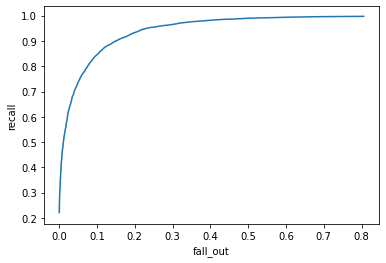

In [ ]:
# ROC_Curve 예제
data_points = 1000
score_list = []
for i in range(data_points):
    threshold = i / data_points
    r2['predict'] = 0
    r2.loc[r2['positive'] > threshold, 'predict'] = 1
    TN, FP, FN, TP = cm(r2['actual'], r2['predict']).ravel() # 네 개의 순서는 고정되어야 함.
    prec = TP / (TP + FP)
    reca = TP / (TP + FN)
    fall = FP / (FP + TN)
    scores = {'precision' : prec, 'recall' : reca, 'fall_out' : fall}
    score_list.append(scores)
curve_df = pd.DataFrame(score_list)
sns.lineplot(data=curve_df, x='fall_out', y='recall')

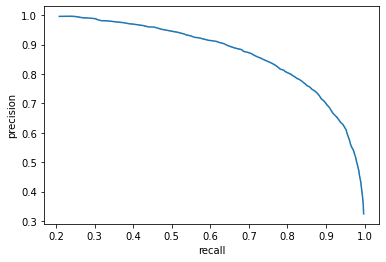

In [ ]:
# PR_Curve 예제
# 위에서 만든 curve_df 데이터 프레임 사용
sns.lineplot(data=curve_df, x='recall', y='precision')

In [ ]:
# ROC_Curve 를 그렸을 때, AUC 는 동일한데, 그래프의 모양이 다른 경우, 어떤 알고리즘의 성능이 좋을까?
# ROC_Curve 의 평가 요소는 여러 개 존재함.

# 그 중의 하나로 점 (0, 1) 과 점 (1, 0) 을 연결하여 선을 그렸을 때,
# 실제 곡선과 직선 그래프와의 면적 차이가 클수록 더 좋은 성능을 가진다고 평가할 수 있다(아래의 두 번째 그래프 참고).
# 그 이유는 차이가 클수록 '확신의 정도' 를 변화시켰을 때, 평가 지표에 따라 그 변화가 확실히 존재한다는 것으로,
# 더 다양한 판단을 내릴 수 있다는 의미를 가진다.

# 따라서 그래프가 직선에 가깝다면 의심을 해야 함(혼동행렬이 어떤지? 확신의 정도를 0 ~ 1 사이에서 충분히 변화시켰는지?)

### 초매개변수 조정
##### 하이퍼파라미터 튜닝, Hyperparameter Tuning
* 알고리즘의 옵션(ex. decisiontree 의 depth)을 조정하여 성능을 튜닝하는 방법
* 옵션에 따라 알고리즘의 성능이 달라진다(좋든 아니든).
* 따라서, 최적의 옵션값을 찾아 알고리즘 성능을 극대화하는 접근법

이 과정의 경우, 이미 최단 시간에 최적의 성능을 찾아주는 솔루션이 자동화되어 있다.  
따라서 공부할 때, 성능이 좋아진다는 것에 집중하여, 이 부분에 시간을 많이 쓸 필요가 없다.  
사람이 열심히 공부해도 결국에는 컴퓨터가 실행하는 분야.

In [ ]:
model = gb(max_depth=10, max_features=0.3)  # Shift + Tab 눌러 옵션 확인하기
# max_depth, max_features 옵션을 바꿔보며, 평가지표 값(성능)을 확인한다(마치 KNN 알고리즘에서 k 값을 바꾸는 것).
model.fit(X_train, y_train)
result_df = pd.DataFrame()
result_df['predict'] = model.predict(X_test)
result_df['actual'] = y_test
TN, FP, FN, TP = cm(result_df['actual'], result_df['predict']).ravel()
recall = TP / (TP + FN)
print(recall)

0.7573728966889813


In [ ]:
def scorer(model):
    model.fit(X_train, y_train)
    result_df = pd.DataFrame()
    result_df['predict'] = model.predict(X_test)
    result_df['actual'] = y_test
    TN, FP, FN, TP = cm(result_df['actual'], result_df['predict']).ravel()
    recall = TP / (TP + FN)
    return recall

In [ ]:
# scorer 함수에 옵션을 설정한 모델을 넣으면, 평가지표 값이 결과로 나온다.
search_model = gb(max_depth=5, max_features=0.3)
scorer(search_model)

0.6783064953862855

##### 하이퍼파라미터 튜닝 접근법
* Grid Search - 그리드(격자) 모양으로 찾기
* Random Search - 무작위 조합으로 찾기(나름의 시스템은 있음)
* Optimizer - (최신반 수업에서 다룸) 수학을 기반으로 함. 베이지안 옵티마이저 검색해보기.

참고로 앞에서 한 것처럼, 직관에 의해 찾은 최적의 조합은 Manual Search 라고 한다.

### Grid Search
##### 격자 무늬를 적용하여 찾아나가는 방식
* 장점 : 거의 확정적으로 좋은 조합을 찾아낼 수 있다.
* 단점 : 거의 모든 조합으로 시도하기 때문에 시간이 오래 걸린다.

Grid Search 의 경우, 한 번 격자 무늬를 나누어 찾기 시작하면, 멈추면 최적의 결과를 보여주지 못한다.  

In [ ]:
md_list = [3, 5, 7, 9, 11, 13, 15]
mf_list = [0.1, 0.3, 0.5, 0.7, 0.9]
all_scores = []
for md in md_list:
    for mf in mf_list:
        # 2중 for 문으로 2가지 하이퍼파리미터의 모든 조합(5 X 5 = 25 개)을 만든다.
        search_model = gb(max_depth=md, max_features=mf)
        # 만든 조합으로 모델 생성
        score = scorer(search_model)
        # 생성한 모델로 평가지표 점수 도출
        all_scores.append({'recall' : score, 'max_depth' : md, 'max_features' : mf})
        # 각 조합별로 평가지표 값을 확인하기 위해, 리스트에 (딕셔너리화한) 결과를 누적하여 보관
hyper_df = pd.DataFrame(all_scores)
hyper_df.sort_values(by='recall', ascending=False)
# 조합별 평가지표 값 데이터 프레임으로 생성 후, 정렬 후, 확인

# 위의 방법처럼 코드를 직접 작성해도 되지만, GridSearchCV 를 활용해도 된다.
# https://wikidocs.net/16594

,recall,max_depth,max_features
28,0.770943,13,0.7
22,0.770219,11,0.5
27,0.768952,13,0.5
21,0.768591,11,0.3
32,0.766419,15,0.5
26,0.766238,13,0.3
29,0.765515,13,0.9
23,0.765153,11,0.7
24,0.764972,11,0.9
33,0.764067,15,0.7


### Random Search
##### 무작위로(?) 찾는다.
* 특정 시간을 걸어두고, 그 안에서 조합을 무작위로 만들어 찾는다.
* 단계를 거쳐서, 찾는 범위(랜덤 숫자 생성)를 줄여나간다.
* 장점 : 하이퍼파라미터 튜닝에 소요되는 시간을 컨트롤 가능.
* 단점 : 최적의 조합을 찾는데 걸리는 시간이 부족할 수도 있음.

Grid Search 의 경우, 격자를 나누는 정도에 따라 알고리즘이 돌아가는 횟수는 정해져 있으나,  
max_depth 와 같은 옵션(파라미터)은 숫자 개수(나누는 기준)와 상관 없이, 돌리는 횟수가 느려지는 경우 多.

In [ ]:
import time
t = time.time()
print(t)

1653910814.909435


In [ ]:
t = time.ctime()
print(t)

Mon May 30 11:40:46 2022


In [ ]:
import time
target_time = 5  # 초 단위
t0 = time.time()  # 시간을 기록(1970년 1월 1일 0시 0분 0초 기준으로 누적한 시간 기록)
while True:
    t1 = time.time() - t0  # time.time()은 반복문 수행 시점 누적 시간, t0는 고정된 전 시점
    # while 문 안에서 소요되는 시간을 t1 으로 보관
    if t1 > target_time:  # 5초가 지나면 탈출(실제 수행 시간도 5초)
        break
print("반복 끝!")

반복 끝!


In [ ]:
import time
from random import randint
target_time = 60
t0 = time.time()
all_scores = []
while True:
    md = randint(3, 10)  # 랜덤한 정수 3 ~ 10 생성
    mf = randint(1, 99) / 100  # 랜덤한 실수 0.01 ~ 0.99 생성
    search_model = gb(max_depth=md, max_features=mf)
    score = scorer(search_model)
    all_scores.append({'recall' : score, 'max_depth' : md, 'max_features' : mf})
    t1 = time.time() - t0
    if t1 > target_time:
        break
hyper_df = pd.DataFrame(all_scores)
hyper_df.sort_values(by='recall', ascending=False)
# Random Search 는 격자 무늬처럼 규칙적으로 나눈 것이 아니라, 랜덤성을 고려하여 정해진 시간 내에 아무 조합이나 찍은 뒤,
# recall 값이 높게 나오는 구역을 마치 등고선처럼 넓게 찾은 뒤,
# 사람이 상위권 구역으로 다시 범위를 재조정하여 점점 좁은 범위로 줄여나간다.

,recall,max_depth,max_features
1,0.766781,10,0.74
2,0.764429,10,0.96
14,0.760991,10,0.27
9,0.755564,9,0.75
5,0.754297,9,0.29
10,0.752669,9,0.83
4,0.740365,9,0.19
12,0.729148,7,0.98
6,0.722815,7,0.31
3,0.707074,10,0.06


In [ ]:
hyper_df.sort_values(by='recall', ascending=False).head().describe()
# 아래 결과표를 이용하여, 점수 상위권 5개의 하이퍼파라미터 범위 확인.

,recall,max_depth,max_features
count,5.000000,5.000000,5.000000
mean,0.760413,9.600000,0.602000
std,0.005430,0.547723,0.306871
min,0.754297,9.000000,0.270000
25%,0.755564,9.000000,0.290000
50%,0.760991,10.000000,0.740000
75%,0.764429,10.000000,0.750000
max,0.766781,10.000000,0.960000


In [ ]:
import time
from random import randint
target_time = 60
t0 = time.time()
all_scores = []
while True:
    md = randint(9, 10)  # 랜덤한 정수 9 ~ 10 생성
    mf = randint(29, 75) / 100  # 랜덤한 실수 0.29 ~ 0.75 생성
    search_model = gb(max_depth=md, max_features=mf)
    score = scorer(search_model)
    all_scores.append({'recall' : score, 'max_depth' : md, 'max_features' : mf})
    t1 = time.time() - t0
    if t1 > target_time:
        break
hyper_df = pd.DataFrame(all_scores)
hyper_df.sort_values(by='recall', ascending=False)

,recall,max_depth,max_features
0,0.769857,10,0.56
11,0.766962,10,0.38
12,0.764248,10,0.75
1,0.762801,10,0.31
4,0.759725,9,0.49
8,0.758820,9,0.70
5,0.757373,9,0.60
2,0.756287,9,0.50
3,0.754297,9,0.37
9,0.753935,9,0.43


In [ ]:
# 위에서 구한 최적화 결과와 본래의 결과 차이 비교하기
model = gb()
model.fit(X_train, y_train)
result_df = pd.DataFrame()
result_df['predict'] = model.predict(X_test)
result_df['actual'] = y_test
TN, FP, FN, TP = cm(result_df['actual'], result_df['predict']).ravel()
recall = TP / (TP + FN)
print(recall)

0.6321693504613715


In [ ]:
final_model = gb(max_depth=10, max_features=0.56)
final_model.fit(X_train, y_train)
result_df = pd.DataFrame()
result_df['predict'] = final_model.predict(X_test)
result_df['actual'] = y_test
TN, FP, FN, TP = cm(result_df['actual'], result_df['predict']).ravel()
recall = TP / (TP + FN)
print(recall)
# 실제로 아래의 하이퍼파라미터 튜닝을 적용하면, recall 값(평가지표)이 좋아짐.
# 그러나, 이미 기계가 자동화한 분야이고, 하이퍼파라미터 튜닝 외에도 성능을 높일 수 있는 방법은 많이 존재한다.
# 따라서 학습에 많은 시간을 쏟을 필요도 없고, 나의 실력 발전에도 큰 도움이 되지 않음.
# 여러 가지 방법이 있지만, 일례로 유효한 feature 를 생성하여 데이터 셋에 집어넣는 게 더 의미가 있음

0.7613533562511308


### 참고. 베이지안 최적화